## Python Data Analysis ##

__Libraries__

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo

__Load Dataset__

In [145]:
pd.options.display.html.use_mathjax = False #avoid change font for the use of $ in $uicideboy$
df_tracks=pd.read_csv('C://Projectos/Spotify Data Analysis Project/Spotify_Data_Extraction.csv')

In [146]:
df_tracks.head(10)

,Unnamed: 0,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,genres
0,0,Mills,Teethed Glory & Injury,Altar Of Plagues,2013-04-30,248.653,27,0.001250,0.1360,0.218,0.70800,0.369,-12.661,0.0385,179.844,3,"['atmospheric black metal', 'avant-garde black..."
1,1,God Alone,Teethed Glory & Injury,Altar Of Plagues,2013-04-30,265.093,23,0.000007,0.3270,0.974,0.23700,0.181,-7.016,0.1360,88.985,1,"['atmospheric black metal', 'avant-garde black..."
2,2,A Body Shrouded,Teethed Glory & Injury,Altar Of Plagues,2013-04-30,299.466,22,0.000027,0.2110,0.824,0.80500,0.107,-6.152,0.0482,105.843,4,"['atmospheric black metal', 'avant-garde black..."
3,3,Burnt Year,Teethed Glory & Injury,Altar Of Plagues,2013-04-30,280.106,18,0.000071,0.2670,0.991,0.00765,0.475,-5.655,0.1940,94.996,4,"['atmospheric black metal', 'avant-garde black..."
4,4,A Remedy And A Fever,Teethed Glory & Injury,Altar Of Plagues,2013-04-30,523.666,16,0.007240,0.1850,0.491,0.83700,0.165,-8.914,0.0352,85.503,3,"['atmospheric black metal', 'avant-garde black..."
5,5,Twelve Was Ruin,Teethed Glory & Injury,Altar Of Plagues,2013-04-30,273.013,14,0.048300,0.2880,0.536,0.51000,0.487,-8.245,0.0458,130.024,4,"['atmospheric black metal', 'avant-garde black..."
6,6,Scald Scar Of Water,Teethed Glory & Injury,Altar Of Plagues,2013-04-30,414.786,13,0.000011,0.3020,0.732,0.87300,0.797,-6.923,0.0539,90.012,3,"['atmospheric black metal', 'avant-garde black..."
7,7,"Found, Oval And Final",Teethed Glory & Injury,Altar Of Plagues,2013-04-30,199.040,16,0.000246,0.4600,0.851,0.35000,0.165,-8.421,0.0717,86.495,4,"['atmospheric black metal', 'avant-garde black..."
8,8,Reflection Pulse Remains,Teethed Glory & Injury,Altar Of Plagues,2013-04-30,377.920,15,0.001010,0.2220,0.836,0.71600,0.105,-6.783,0.0952,148.196,3,"['atmospheric black metal', 'avant-garde black..."
9,9,dissociating,"we had good times together, don't forget that",Sewerslvt,2021-11-12,342.545,41,0.001170,0.0677,0.880,0.80100,0.913,-3.784,0.0960,73.311,4,"['atmospheric dnb', 'chill breakcore', 'glitch..."


__Check null values in Dataset__

In [122]:
pd.isnull(df_tracks).sum()

Unnamed: 0          0
name                0
album               0
artist              0
release_date        0
length              0
popularity          0
acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
genres              0
dtype: int64

__Delete 'Unnamed: 0' and 'time_signature' because they are not useful for the analysis.__

In [123]:
df_tracks.drop(['Unnamed: 0','time_signature'],inplace=True, axis=1)

## Analysis ##

__Descriptive Statistics__

In [124]:
df_tracks.describe().transpose().drop(['count','25%','50%','75%'], axis=1)

,mean,std,min,max
length,282.303430,149.098919,46.158000,1020.614
popularity,29.801325,15.121224,0.000000,72.000
acousticness,0.166388,0.288803,0.000001,0.991
danceability,0.382954,0.170988,0.000000,0.912
energy,0.715249,0.240550,0.000265,0.997
instrumentalness,0.462578,0.396927,0.000000,0.980
liveness,0.232975,0.177296,0.029200,0.945
loudness,-8.085421,4.317244,-26.260000,-0.574
speechiness,0.096551,0.080357,0.000000,0.457
tempo,122.320825,32.627030,0.000000,200.082


__Top 10 popular songs__

In [125]:
ranking_of_popularity = df_tracks.sort_values('popularity', ascending=False).head(10)
ranking_of_popularity

,name,album,artist,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,genres
258,Glory Box,Dummy,Portishead,1994-01-01,308.626,72,0.17700,0.510,0.434,0.516000,0.0603,-10.004,0.0361,119.695,"['alternative rock', 'art pop', 'dark pop', 'e..."
34,O Pana!,Eternal Grey,$uicideboy$,2016-09-11,128.417,71,0.01990,0.797,0.504,0.000025,0.1980,-6.538,0.1140,114.994,"['cloud rap', 'dark trap', 'new orleans rap', ..."
287,I'm God,Instrumental Relics,Clams Casino,2020-04-24,277.710,65,0.07110,0.529,0.641,0.760000,0.1020,-6.780,0.0336,141.927,"['cloud rap', 'experimental hip hop', 'instrum..."
255,Roads,Dummy,Portishead,1994-01-01,303.973,64,0.77800,0.607,0.294,0.162000,0.1060,-11.836,0.0764,76.083,"['alternative rock', 'art pop', 'dark pop', 'e..."
249,Sour Times,Dummy,Portishead,1994-01-01,252.266,63,0.05080,0.698,0.633,0.272000,0.2640,-6.680,0.0406,94.085,"['alternative rock', 'art pop', 'dark pop', 'e..."
69,Mg1,Wlfgrl,Machine Girl,2014-02-17,46.158,62,0.56200,0.339,0.810,0.289000,0.5930,-8.407,0.3760,93.648,"['digital hardcore', 'hardvapour']"
24,Say Cheese and Die,Eternal Grey,$uicideboy$,2016-09-11,161.750,61,0.03360,0.717,0.803,0.000002,0.1500,-6.113,0.1130,94.962,"['cloud rap', 'dark trap', 'new orleans rap', ..."
73,Ghost,Wlfgrl,Machine Girl,2014-02-17,185.521,61,0.00576,0.705,0.924,0.927000,0.3600,-6.783,0.1770,154.008,"['digital hardcore', 'hardvapour']"
25,Eclipse,Eternal Grey,$uicideboy$,2016-09-11,127.921,59,0.27600,0.768,0.599,0.000000,0.1240,-7.366,0.0820,104.967,"['cloud rap', 'dark trap', 'new orleans rap', ..."
23,BREAKDALAW2k16,Eternal Grey,$uicideboy$,2016-09-11,110.395,59,0.00766,0.761,0.684,0.000000,0.1170,-8.797,0.0821,87.017,"['cloud rap', 'dark trap', 'new orleans rap', ..."


__Top 5 popular artists__

In [126]:
group_artists = df_tracks.groupby(['artist'])['popularity'].agg('mean')
ranking_of_artists = group_artists.sort_values(ascending=False).head(5)
ranking_of_artists 

artist
$uicideboy$       57.785714
Portishead        56.636364
Machine Girl      47.000000
The Mars Volta    44.900000
Crywank           42.333333
Name: popularity, dtype: float64

__Correlation Heatmap__

Text(0.5, 1.0, 'Correlation Heatmap Between Variables')

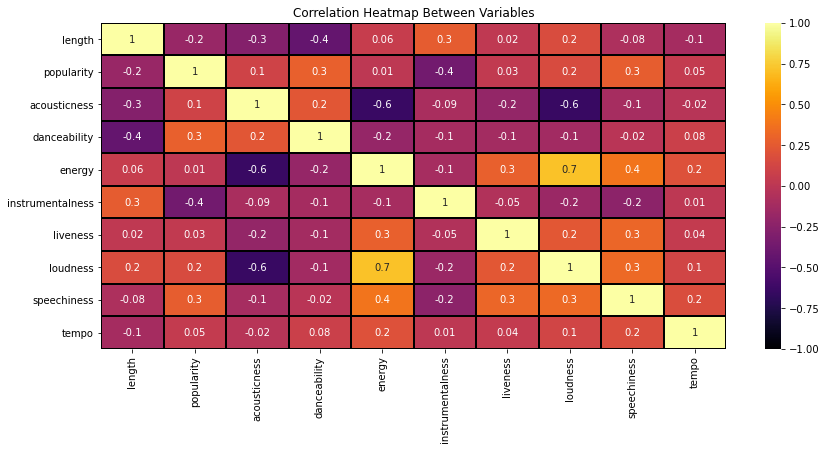

In [127]:
correlation=df_tracks.corr(method='pearson')
plt.figure(figsize=(14,6))
heatmap=sns.heatmap(correlation,annot=True,fmt='.1g',vmin=-1,vmax=1,center=0,cmap='inferno',linewidths=1,linecolor='Black')
heatmap.set_title('Correlation Heatmap Between Variables')

__Plots Regression__

[Text(0.5, 1.0, 'Loudness vs Energy Correlation')]

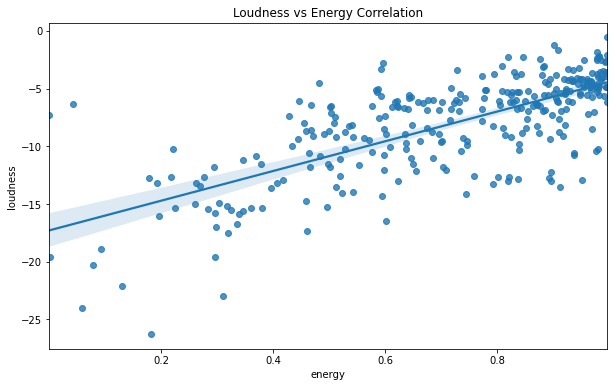

In [128]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_tracks, y='loudness', x='energy').set(title='Loudness vs Energy Correlation')

[Text(0.5, 1.0, 'Popularity vs Danceability Correlation')]

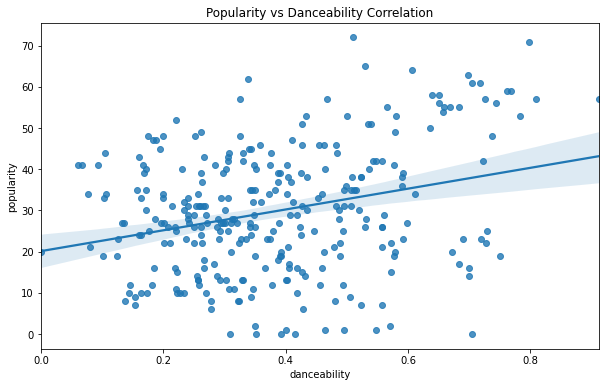

In [129]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_tracks, y='popularity', x='danceability').set(title='Popularity vs Danceability Correlation')

__Change relase date to year__

In [130]:
df_tracks['release_date'] = pd.to_datetime(df_tracks['release_date']) #change realease_date to datatime
df_tracks['Year'] = df_tracks['release_date'].dt.strftime('%Y')

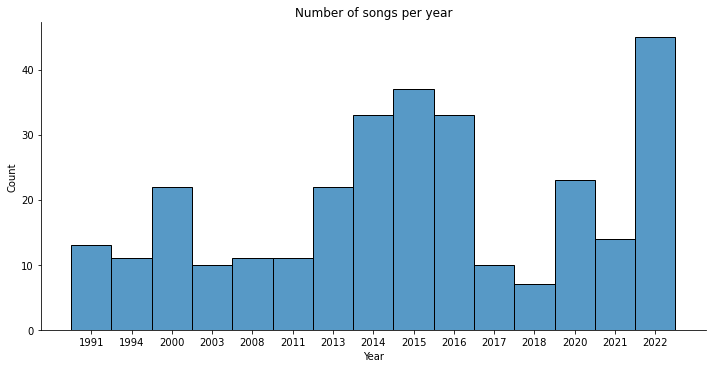

In [131]:
years=df_tracks['Year'].sort_values(ascending=True)
sns.displot(years, discrete=True, aspect=2, height=5, kind='hist').set(title='Number of songs per year')

In [153]:
mean_top10_songs=ranking_of_popularity[['acousticness','danceability','energy','instrumentalness','liveness','speechiness']].mean()
all_song_sort_by_popularity=df_tracks.sort_values('popularity', ascending=False)
mean_rest=all_song_sort_by_popularity[10:][['acousticness','danceability','energy','instrumentalness','liveness','speechiness']].mean()

feat_cols = ['acousticness','danceability','energy','instrumentalness','liveness','speechiness']
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_rest, theta=feat_cols, fill='toself', name='Top 10'),
        go.Scatterpolar(r=mean_top10_songs, theta=feat_cols, fill='toself', name='Rest'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

fig.show()


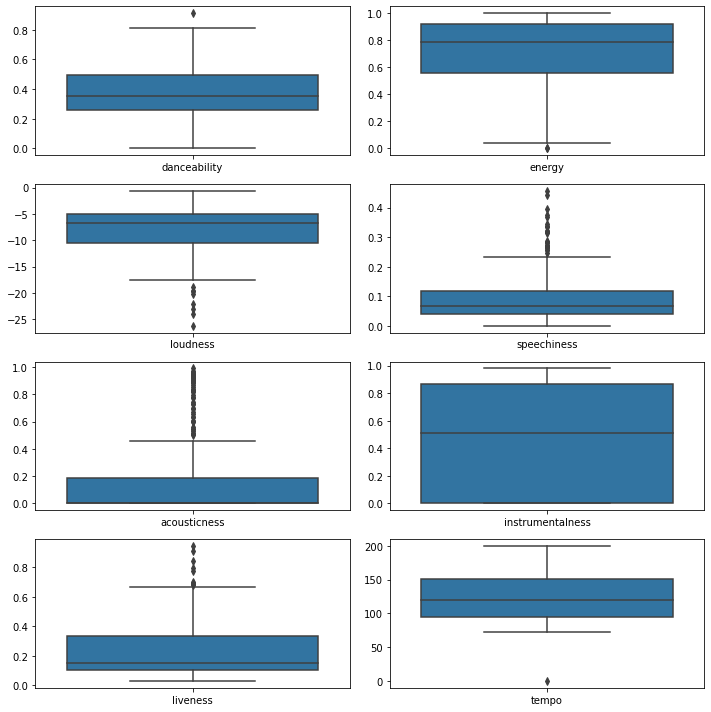

In [133]:
# Extract the audio features into separate dataframes for each feature
danceability = df_tracks[['danceability']]
energy = df_tracks[['energy']]
loudness = df_tracks[['loudness']]
speechiness = df_tracks[['speechiness']]
acousticness = df_tracks[['acousticness']]
instrumentalness = df_tracks[['instrumentalness']]
liveness = df_tracks[['liveness']]
tempo = df_tracks[['tempo']]

# Combine the audio feature dataframes into a list for easy iteration
audio_feature_list = [danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, tempo]

# Create a boxplot of each audio feature
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(10,10))
for i, ax in enumerate(axs.flatten()):
    sns.boxplot(data=audio_feature_list[i], ax=ax)
plt.tight_layout()
plt.show()

In [147]:
import re

# Define a dictionary mapping regular expressions to more general genre names
genre_map = {
  
    r'.*metal.*': 'metal',
    r'.*rock.*': 'rock',
    r'.*pop.*': 'pop',
    r'.*jazz.*': 'jazz',
    r'.*indie.*': 'indie',
    r'.*hip hop.*': 'hip hop',
    r'.*rap.*': 'hip hop',
    r'.*breakcore.*':'electronic',
    r'.*.*': 'electronic',
    r'.*hardcore.*': 'hardcore',
    
}

# Define a function to apply the genre mapping to a single genre name
def map_genre(genre):
    for pattern, mapped_genre in genre_map.items():
        if re.match(pattern, genre):
            return mapped_genre
    return genre

# Apply the genre mapping function to the 'genre' column of your DataFrame
df_tracks['genres'] = df_tracks['genres'].apply(map_genre)

genre_counts = df_tracks['genres'].value_counts()
genre_counts


metal         135
electronic     53
rock           45
indie          31
hip hop        28
jazz            9
pop             1
Name: genres, dtype: int64

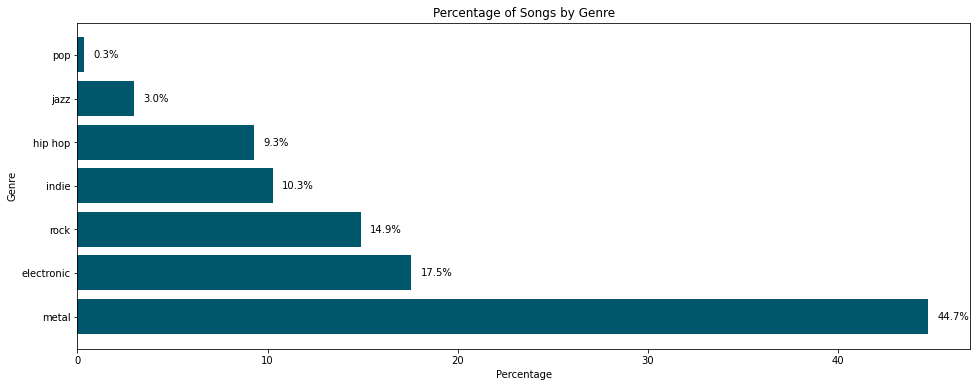

In [181]:
#plt.title("Division")
#plt.bar(genre_counts, labels = genre_counts.index, autopct='%1.1f%%');
#genre_counts.plot(kind='barh')

# Calculate the percentage of songs in each genre
genre_percents = (genre_counts / genre_counts.sum()) * 100
genre_percents =genre_percents

# Create a horizontal bar plot
fig, ax = plt.subplots(figsize=(16, 6))
ax.barh(genre_percents.index, genre_percents.values, color="#00576B")
ax.set_xlabel("Percentage")
ax.set_ylabel("Genre")
ax.set_title("Percentage of Songs by Genre")

# Add the percentage labels to the bars
for i, v in enumerate(genre_percents.values):
    ax.text(v + 0.5, i, f"{v:.1f}%", color="black", fontsize=10, va="center")

plt.show()

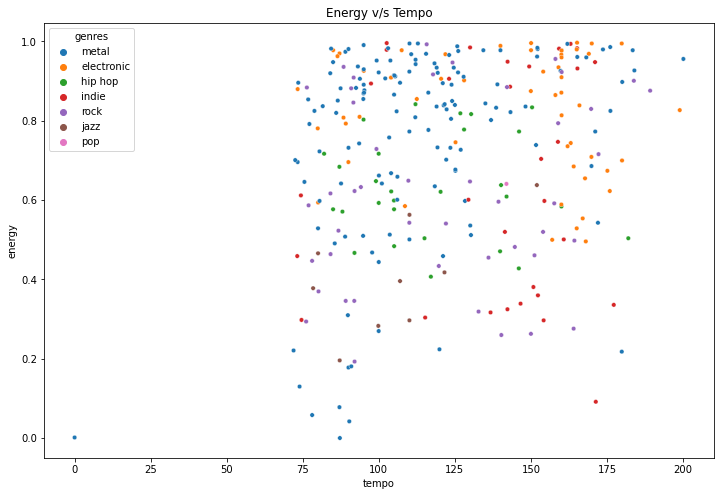

In [149]:
plt.figure(figsize = (12,8))
plt.title ("Energy v/s Tempo")
sns.scatterplot(x='tempo', y='energy', hue='genres', data=df_tracks,s=20);

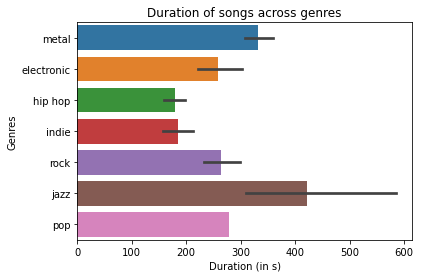

In [191]:
plt.title("Duration of songs across genres")
sns.color_palette("husl",15)
sns.barplot(y='genres', x='length', data=df_tracks)
plt.xlabel("Duration (in s)")
plt.ylabel("Genres");